#### Importing necessary libraries

In [1]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

Tensorflow version: 2.8.2
Keras version: 2.8.0


In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Building the three models

Basic model built before applying it to the dataset.

Model 1

- One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0
- One Pooling layerwhich uses MAXPOOLINGwith stride =2.
- One hidden layer having number of neurons = 100

model1 = tf.keras.Sequential()
model1.add(tf.keras.Input(shape=input_shape))

model1.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu',padding = 'valid',strides=(1,1)))
model1.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))
model1.add(tf.keras.Flatten(name = "inputLayer"))
model1.add(tf.keras.Dense(100,activation = "relu", name = "HiddenLayer1"))
model1.add(tf.keras.Dense(num_class, activation = "softmax", name = "OutputLayer"))

model1.summary()

Model 2

- Two back-to-backConvolution layerswhich uses 32 kernels each of size 3x3, stride = 1 and, padding =0
- One Pooling layer which uses MAXPOOLING with stride =2.
- One hidden layer having number of neurons = 100

model2 = tf.keras.Sequential()

model2.add(tf.keras.Input(shape=input_shape))
model2.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',padding = 'valid',strides=(1,1)))
model2.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',padding = 'valid',strides=(1,1)))
model2.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))

model2.add(tf.keras.Flatten(name = "inputLayer"))
model2.add(tf.keras.Dense(100,activation = "relu", name = "HiddenLayer1"))
model2.add(tf.keras.Dense(num_class, activation = "softmax", name = "OutputLayer"))

model2.summary()

Model 3

- Designing the LeNet 5 architecture

model3 = tf.keras.Sequential()

model3.add(tf.keras.Input(shape=input_shape))
model3.add(tf.keras.layers.Conv2D(filters=6,kernel_size=(5,5),activation='tanh',padding='same'))#,input_shape=(28,28,1)
model3.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))
model3.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(5,5),activation='tanh',padding="valid"))
model3.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))

model3.add(tf.keras.Flatten(name = "inputLayer"))
model3.add(tf.keras.layers.Dense(units=120, activation='sigmoid'))
model3.add(tf.keras.layers.Dense(units=84, activation='sigmoid'))
model3.add(tf.keras.Dense(num_class, activation = "softmax", name = "OutputLayer"))

model3.summary()

#### Working with MNIST DataSet

In [3]:
#loading the dataset
mnist = tf.keras.datasets.mnist

In [4]:
#splitting into train and test
(x_train, y_train),(x_test,y_test) = mnist.load_data()

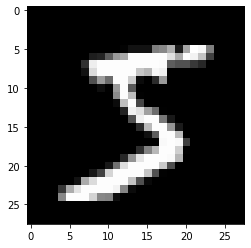

In [5]:
plt.imshow(x_train[0],cmap = 'gray')

In [6]:
# finding the number of classes
num_classes = len(set(y_train))
print("The number of classes are: ",num_classes)

The number of classes are:  10


In [7]:
#finding the dimension of each image
print("Dimension of each image: ",x_train[0].shape)

Dimension of each image:  (28, 28)


In [8]:
#specifying input shape
input_shape = (28,28,1)

In [9]:
#performing normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
#seeing if the min and max is 0 and 1
print("Max: ",np.max(x_train[0]))
print("Min: ",np.min(x_train[0]))

Max:  1.0
Min:  0.0


In [11]:
#hence normalization has been performed

In [12]:
#model1
model1 = tf.keras.Sequential()
model1.add(tf.keras.Input(shape=input_shape))

model1.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu',padding = 'valid',strides=(1,1)))
model1.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))
model1.add(tf.keras.layers.Flatten(name = "inputLayer"))
model1.add(tf.keras.layers.Dense(100,activation = "relu", name = "HiddenLayer1"))
model1.add(tf.keras.layers.Dense(num_classes, activation = "softmax", name = "OutputLayer"))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 inputLayer (Flatten)        (None, 4608)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               460900    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
__________________________________________________

In [13]:
#model2
model2 = tf.keras.Sequential()

model2.add(tf.keras.Input(shape=input_shape))
model2.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',padding = 'valid',strides=(1,1)))
model2.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',padding = 'valid',strides=(1,1)))
model2.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))

model2.add(tf.keras.layers.Flatten(name = "inputLayer"))
model2.add(tf.keras.layers.Dense(100,activation = "relu", name = "HiddenLayer1"))
model2.add(tf.keras.layers.Dense(num_classes, activation = "softmax", name = "OutputLayer"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 inputLayer (Flatten)        (None, 4608)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               460900    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                      

In [14]:
#model3
model3 = tf.keras.Sequential()

model3.add(tf.keras.Input(shape=input_shape))
model3.add(tf.keras.layers.Conv2D(filters=6,kernel_size=(5,5), activation = "tanh", padding="same"))#,input_shape=(28,28,1)
model3.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))
model3.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(5,5),activation = "tanh",padding="valid"))
model3.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))

model3.add(tf.keras.layers.Flatten(name = "inputLayer"))
model3.add(tf.keras.layers.Dense(units=120, activation='sigmoid'))
model3.add(tf.keras.layers.Dense(units=84, activation='sigmoid'))
model3.add(tf.keras.layers.Dense(num_classes, activation = "softmax", name = "OutputLayer"))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 inputLayer (Flatten)        (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)              

In [15]:
batch_size_global = 32
epochs_global = 15

In [16]:
#implementing early stopping 
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)

In [17]:

model1.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics =["accuracy"])
history1  = model1.fit(x_train, y_train, batch_size = batch_size_global, epochs = epochs_global, validation_split = 0.1,callbacks=callback)

Epoch 1/15
1688/1688 [==============================] - 9s 3ms/step - loss: 0.1500 - accuracy: 0.9547 - val_loss: 0.0604 - val_accuracy: 0.9808
Epoch 2/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0516 - accuracy: 0.9844 - val_loss: 0.0504 - val_accuracy: 0.9865
Epoch 3/15
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0408 - val_accuracy: 0.9890
Epoch 4/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0372 - val_accuracy: 0.9900
Epoch 5/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.0404 - val_accuracy: 0.9895
Epoch 6/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 0.0469 - val_accuracy: 0.9888
Epoch 7/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.0578 - val_accuracy:

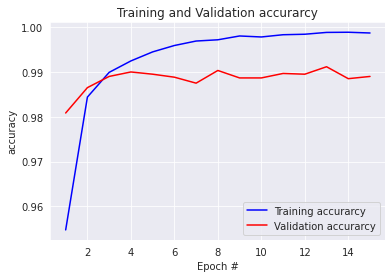

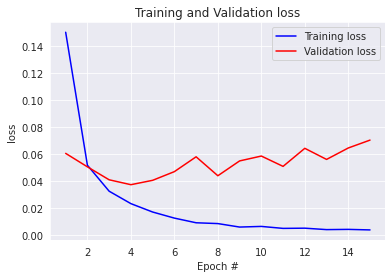

In [18]:
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [19]:
model2.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics =["accuracy"])
history2  = model2.fit(x_train, y_train, batch_size = batch_size_global, epochs = epochs_global, validation_split = 0.1,callbacks=callback)

Epoch 1/15
1688/1688 [==============================] - 8s 4ms/step - loss: 0.1291 - accuracy: 0.9616 - val_loss: 0.0498 - val_accuracy: 0.9860
Epoch 2/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0433 - accuracy: 0.9863 - val_loss: 0.0426 - val_accuracy: 0.9873
Epoch 3/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0269 - accuracy: 0.9912 - val_loss: 0.0472 - val_accuracy: 0.9870
Epoch 4/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0190 - accuracy: 0.9935 - val_loss: 0.0359 - val_accuracy: 0.9917
Epoch 5/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0132 - accuracy: 0.9953 - val_loss: 0.0480 - val_accuracy: 0.9878
Epoch 6/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.0422 - val_accuracy: 0.9915
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.0439 - val_accuracy:

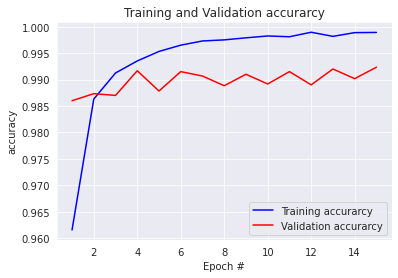

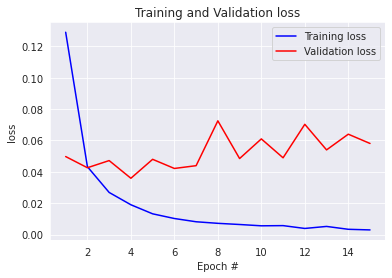

In [20]:
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [21]:
model3.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics =["accuracy"])
history3  = model3.fit(x_train, y_train, batch_size = batch_size_global, epochs = epochs_global, validation_split = 0.1,callbacks=callback)

Epoch 1/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3174 - accuracy: 0.9187 - val_loss: 0.0819 - val_accuracy: 0.9728
Epoch 2/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0714 - accuracy: 0.9794 - val_loss: 0.0559 - val_accuracy: 0.9835
Epoch 3/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0498 - accuracy: 0.9854 - val_loss: 0.0542 - val_accuracy: 0.9835
Epoch 4/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0424 - val_accuracy: 0.9877
Epoch 5/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0289 - accuracy: 0.9914 - val_loss: 0.0439 - val_accuracy: 0.9865
Epoch 6/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0227 - accuracy: 0.9931 - val_loss: 0.0385 - val_accuracy: 0.9882
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0180 - accuracy: 0.9943 - val_loss: 0.0450 - val_accuracy:

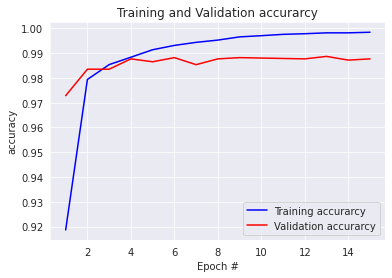

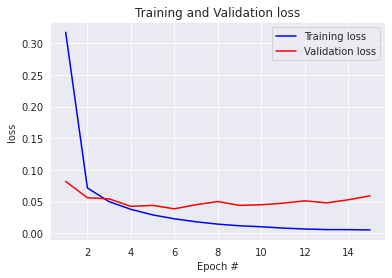

In [22]:
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [23]:
result_list=[]
model_list=[]

In [24]:
model_list.append("Model1,mnist")
result_list.append(model1.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0587 - accuracy: 0.9881


In [25]:
model_list.append("Model2,mnist")
result_list.append(model2.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0518 - accuracy: 0.9908


In [26]:
model_list.append("Model3,mnist")
result_list.append(model3.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0531 - accuracy: 0.9861


#### Working with CIFR-10 DataSet

In [27]:
#loading the dataset
cifar = tf.keras.datasets.cifar10

In [28]:
#splitting into train and test
(x_train_c, y_train_c),(x_test_c,y_test_c) = cifar.load_data()

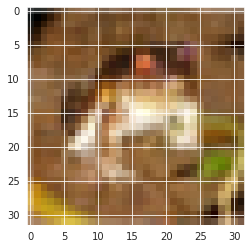

In [55]:
plt.imshow(x_train_c[0])

In [32]:
# finding the number of classes
#num_class = len(set(y_train_c))
#print("The number of classes are: ",num_class)

In [33]:
#finding the dimension of each image
print("Dimension of each image: ",x_train_c[0].shape)

Dimension of each image:  (32, 32, 3)


In [34]:
#specifying input shape
input_shape1 = (32,32,3)

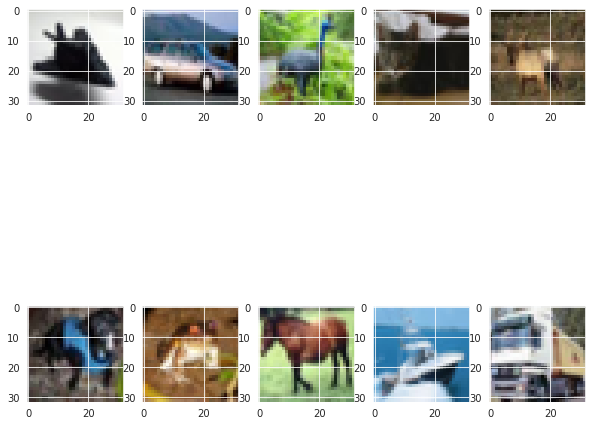

In [35]:
#display one image from each class
(x,id) = np.unique(y_train_c, return_index=True)
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train_c[id[i]],cmap="gray")

In [36]:
#preprocessing the dataset
#performing normalization
x_train_c = x_train_c/255.0
x_test_c = x_test_c/255.0

In [37]:
#seeing if the min and max is 0 and 1
print("Max: ",np.max(x_train_c[0]))
print("Min: ",np.min(x_train_c[0]))

Max:  1.0
Min:  0.0


In [38]:
#hence normalization has been performed

In [39]:
#model1_c
model4 = tf.keras.Sequential()
model4.add(tf.keras.Input(shape=input_shape1))

model4.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu',padding = 'valid',strides=(1,1)))
model4.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))
model4.add(tf.keras.layers.Flatten(name = "inputLayer"))
model4.add(tf.keras.layers.Dense(100,activation = "relu", name = "HiddenLayer1"))
model4.add(tf.keras.layers.Dense(num_classes, activation = "softmax", name = "OutputLayer"))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 inputLayer (Flatten)        (None, 6272)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               627300    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 630,742
Trainable params: 630,742
Non-trainable params: 0
________________________________________________

In [40]:
#model2_c
model5 = tf.keras.Sequential()

model5.add(tf.keras.Input(shape=input_shape1))
model5.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',padding = 'valid',strides=(1,1)))
model5.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',padding = 'valid',strides=(1,1)))
model5.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))

model5.add(tf.keras.layers.Flatten(name = "inputLayer"))
model5.add(tf.keras.layers.Dense(100,activation = "relu", name = "HiddenLayer1"))
model5.add(tf.keras.layers.Dense(num_classes, activation = "softmax", name = "OutputLayer"))

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 inputLayer (Flatten)        (None, 6272)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               627300    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                      

In [41]:
#model3_c
model6 = tf.keras.Sequential()

model6.add(tf.keras.Input(shape=input_shape1))
model6.add(tf.keras.layers.Conv2D(filters=6,kernel_size=(5,5), activation = "tanh", padding="same"))#,input_shape=(28,28,1)
model6.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))
model6.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(5,5),activation = "tanh",padding="valid"))
model6.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))

model6.add(tf.keras.layers.Flatten(name = "inputLayer"))
model6.add(tf.keras.layers.Dense(units=120, activation='sigmoid'))
model6.add(tf.keras.layers.Dense(units=84, activation='sigmoid'))
model6.add(tf.keras.layers.Dense(num_classes, activation = "softmax", name = "OutputLayer"))

model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 inputLayer (Flatten)        (None, 576)               0         
                                                                 
 dense_2 (Dense)             (None, 120)              

In [42]:
model4.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics =["accuracy"])
history4  = model4.fit(x_train_c, y_train_c, batch_size = batch_size_global, epochs = epochs_global, validation_split = 0.1,callbacks=callback)

Epoch 1/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4747 - accuracy: 0.4722 - val_loss: 1.2614 - val_accuracy: 0.5474
Epoch 2/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1945 - accuracy: 0.5788 - val_loss: 1.1820 - val_accuracy: 0.5910
Epoch 3/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0481 - accuracy: 0.6300 - val_loss: 1.1051 - val_accuracy: 0.6242
Epoch 4/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.9365 - accuracy: 0.6720 - val_loss: 1.0470 - val_accuracy: 0.6376
Epoch 5/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8449 - accuracy: 0.7044 - val_loss: 1.1386 - val_accuracy: 0.6190
Epoch 6/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.7599 - accuracy: 0.7350 - val_loss: 1.1164 - val_accuracy: 0.6312
Epoch 7/15
1407/1407 [==============================] - 5s 3ms/step - loss: 0.6879 - accuracy: 0.7578 - val_loss: 1.0761 - val_accuracy:

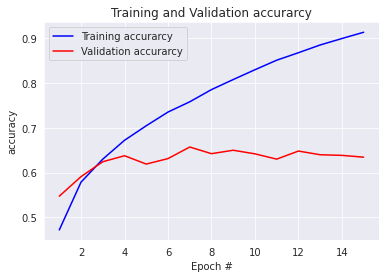

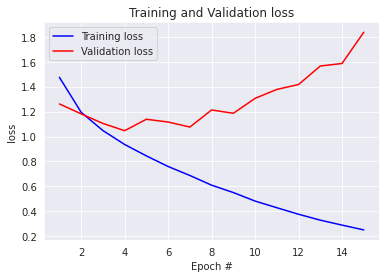

In [43]:
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [44]:
model5.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics =["accuracy"])
history5  = model5.fit(x_train_c, y_train_c, batch_size = batch_size_global, epochs = epochs_global, validation_split = 0.1,callbacks=callback)

Epoch 1/15
1407/1407 [==============================] - 7s 4ms/step - loss: 1.4302 - accuracy: 0.4869 - val_loss: 1.1285 - val_accuracy: 0.6150
Epoch 2/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0412 - accuracy: 0.6346 - val_loss: 0.9895 - val_accuracy: 0.6592
Epoch 3/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.9002 - accuracy: 0.6854 - val_loss: 0.9499 - val_accuracy: 0.6704
Epoch 4/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8043 - accuracy: 0.7188 - val_loss: 0.9330 - val_accuracy: 0.6816
Epoch 5/15
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7318 - accuracy: 0.7443 - val_loss: 0.9330 - val_accuracy: 0.6896
Epoch 6/15
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6581 - accuracy: 0.7701 - val_loss: 0.9571 - val_accuracy: 0.6802
Epoch 7/15
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5879 - accuracy: 0.7951 - val_loss: 1.0513 - val_accuracy:

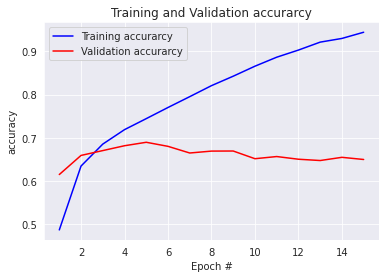

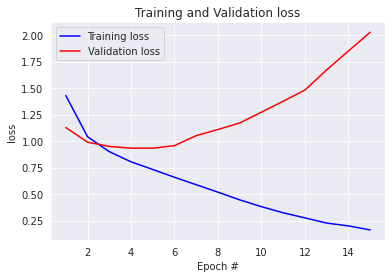

In [45]:
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [46]:
model6.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics =["accuracy"])
history6  = model6.fit(x_train_c, y_train_c, batch_size = batch_size_global, epochs = epochs_global, validation_split = 0.1,callbacks=callback)

Epoch 1/15
1407/1407 [==============================] - 7s 4ms/step - loss: 1.6818 - accuracy: 0.3843 - val_loss: 1.4250 - val_accuracy: 0.4876
Epoch 2/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.3685 - accuracy: 0.5065 - val_loss: 1.2893 - val_accuracy: 0.5356
Epoch 3/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2471 - accuracy: 0.5535 - val_loss: 1.2081 - val_accuracy: 0.5666
Epoch 4/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.1535 - accuracy: 0.5879 - val_loss: 1.1723 - val_accuracy: 0.5816
Epoch 5/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0823 - accuracy: 0.6134 - val_loss: 1.1011 - val_accuracy: 0.6080
Epoch 6/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0170 - accuracy: 0.6409 - val_loss: 1.1131 - val_accuracy: 0.6022
Epoch 7/15
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9624 - accuracy: 0.6617 - val_loss: 1.0447 - val_accuracy:

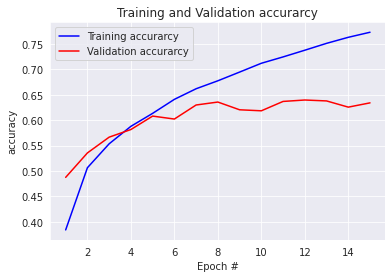

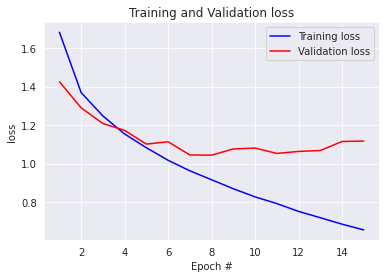

In [47]:
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [48]:
model_list.append("Model1,cifar")
result_list.append(model4.evaluate(x_test_c, y_test_c))

313/313 [==============================] - 1s 3ms/step - loss: 1.8858 - accuracy: 0.6155


In [49]:
model_list.append("Model2,cifar")
result_list.append(model5.evaluate(x_test_c, y_test_c))

313/313 [==============================] - 1s 3ms/step - loss: 2.0918 - accuracy: 0.6322


In [50]:
model_list.append("Model3,cifar")
result_list.append(model6.evaluate(x_test_c, y_test_c))

313/313 [==============================] - 1s 3ms/step - loss: 1.1605 - accuracy: 0.6256


In [51]:
print(model_list)
print(result_list)

['Model1,mnist', 'Model2,mnist', 'Model3,mnist', 'Model1,cifar', 'Model2,cifar', 'Model3,cifar']
[[0.05872231349349022, 0.988099992275238], [0.05177254602313042, 0.9908000230789185], [0.053065940737724304, 0.9861000180244446], [1.8858429193496704, 0.6154999732971191], [2.0918266773223877, 0.6322000026702881], [1.160496711730957, 0.6255999803543091]]


In [52]:
df_m = pd.DataFrame(model_list,columns = ["Models"])
df_m.head()

,Models
0,"Model1,mnist"
1,"Model2,mnist"
2,"Model3,mnist"
3,"Model1,cifar"
4,"Model2,cifar"


In [53]:
df_r = pd.DataFrame(result_list,columns = ["loss","accuracy"])
df_r.head()

,loss,accuracy
0,0.058722,0.9881
1,0.051773,0.9908
2,0.053066,0.9861
3,1.885843,0.6155
4,2.091827,0.6322


In [54]:
df = pd.concat([df_m, df_r], axis=1)
df

,Models,loss,accuracy
0,"Model1,mnist",0.058722,0.9881
1,"Model2,mnist",0.051773,0.9908
2,"Model3,mnist",0.053066,0.9861
3,"Model1,cifar",1.885843,0.6155
4,"Model2,cifar",2.091827,0.6322
5,"Model3,cifar",1.160497,0.6256


#### Comparing the above three architectures of the above built models for the two datasets

The three models perform equally well with almost the same accuracy for the same datasets. If we take a closer look we find the highest accuracy was provided by the second model in both cases with an accuracy of 99.08% and 63.22%.

Therefore, the three architectures perform similarly for all cases.